#CS 6375 Machine Learning
#Assignment 2
#Group members:
> Hasini Gammune-dvg190000

> Mahesh Ranpati Dewage-mkr200000


# Import the Libraries

In [ ]:
# Standard liraries to handel dataframes and arrays
import numpy as np
import pandas as pd

# Library to read data from a diferent domain
import requests

# seaborn library
import seaborn as sns

#plotting libraries
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from pandas.plotting import scatter_matrix

#preprcess data
from sklearn.preprocessing import LabelEncoder
#to split train and test data
from sklearn.model_selection import train_test_split
#to scale and standardize features
from sklearn.preprocessing import StandardScaler
#to convert catogorical data into numericals
from sklearn.preprocessing import OneHotEncoder

#we use tensorflow only for certain part of analyis and preprocess
import tensorflow as tf
import warnings

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# To print the last complile time and date
import datetime
import pytz

from tabulate import tabulate

# Import Data

In [ ]:
#Import data from GitHub
red_wine_df_path="https://raw.githubusercontent.com/MaheshRanDe/CS_ML_Assignment_2/main/winequality-red.csv"
red_wine_df=pd.read_csv(red_wine_df_path, sep = ';')

#Define the activation functions
### There are three types of activation functions that we are asked to use namely
> Sigmoid function:  $\sigma(x) = \frac{1}{1 + e^{-x}}$

> Hyperbolic Tangent function:  $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

> ReLU function:  $\text{ReLU}(x) = \max{(0,x)}$


In [ ]:
def activationFun(x, function_type="sigmoid"):
    if function_type.lower() == "sigmoid":
        return 1 / (1 + np.exp(-x))
    if function_type.lower() == "tanh":
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    if function_type.lower() == "relu":
        return np.maximum(0, x)
    else:
        raise ValueError("function_type must be sigmoid, tanh, or ReLU")


# Derivatives of each Activation Function

In [ ]:
# derivatives of activation functions
def activationFunDerivative(x, function_type="sigmoid"):
    if function_type.lower() == "sigmoid":
        sigmoid = activationFun(x, "sigmoid")
        return sigmoid * (1 - sigmoid)
    if function_type.lower() == "tanh":
        return 1 - np.square(activationFun(x, "tanh"))
    if function_type.lower() == "relu":
        return np.where(x > 0, 1, 0)
    else:
        raise ValueError("function_type must be sigmoid, tanh, or ReLU")

# Define the Neural Network Class

In [ ]:
class neuralNetwork:
    def __init__(self, size_input_layer, size_hidden_layer1, size_hidden_layer2, size_output_layer, activation_type="sigmoid"):
        #self.data=dataFrame
        self.size_input = size_input_layer
        self.size_hidden1 = size_hidden_layer1
        self.size_hidden2 = size_hidden_layer2
        self.size_output = size_output_layer
        self.activation_type = activation_type

        # Initialize biases and weights
        # here biases are initialized to zeros weights are initialized to random numbers

        # Input to hidden layer 1 connections
        self.W1 = np.random.randn(self.size_input, self.size_hidden1)
        self.b1 = np.zeros((1, self.size_hidden1))

        # Hidden layer 1 to hidden layer 2 connections
        self.W2 = np.random.randn(self.size_hidden1, self.size_hidden2)
        self.b2 = np.zeros((1, self.size_hidden2))

        # Hidden layer 2 to output layer connections
        self.W3 = np.random.randn(self.size_hidden2, self.size_output)
        self.b3 = np.zeros((1, self.size_output))

        # Momentum variables
        self.v_dW1 = np.zeros((self.size_input, self.size_hidden1))
        self.v_db1 = np.zeros((1, self.size_hidden1))
        self.v_dW2 = np.zeros((self.size_hidden1, self.size_hidden2))
        self.v_db2 = np.zeros((1, self.size_hidden2))
        self.v_dW3 = np.zeros((self.size_hidden2, self.size_output))
        self.v_db3 = np.zeros((1, self.size_output))

    # method for explanatory analysis
    def exploratory_data_analysis(self, dataFrame):
          self.df = dataFrame
          info = self.df.info()
          print("Information about the dataset \n \n" ,info, "\n")
          # Checking for missing values
          null_val = self.df.isnull().sum()
          print("missing values in each variable \n \n" ,null_val, "\n")

          # Histograms
          self.df.hist( bins=25,figsize=(10,10))
          plt.suptitle("Histograms of Wine Dataset", fontsize=12)

          #Class conditional distributions
          warnings.filterwarnings('ignore')
          fig = plt.figure(figsize=(10, 10))
          fig.subplots_adjust(hspace=0.4, wspace=0.4)
          # feature names are taken from the dataframe
          features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                'density', 'pH', 'sulphates', 'alcohol']

          for i, feature in enumerate(features, 1):
            axs = fig.add_subplot(4, 3, i)
            self.df.boxplot(column=feature, by='quality', ax=axs)
            axs.set_title(feature)
          fig.tight_layout()

          # Correlation analysis
          fig , ax = plt.subplots(figsize = (9,6))
          sns.heatmap(self.df.corr() , annot = True , ax = ax, cmap='magma')
          plt.suptitle("Heatmap of Correlations", fontsize=12)
          plt.show()

          # Variable selection
          X = self.df.drop(['quality'], axis = 1)
          y = self.df['quality']
          sc = StandardScaler()
          scaler = sc.fit(X)
          X = scaler.transform(X)

          model = RandomForestRegressor(random_state=1, max_depth=12)
          model.fit(X, y)
          winedummy = pd.get_dummies(self.df)
          features = winedummy.columns
          importances = model.feature_importances_
          indices = np.argsort(importances)[:]

          # Define colormap
          cmap = plt.cm.get_cmap('mako')

          plt.figure(figsize=(8, 6))
          plt.title('Feature Importances')

          # Plot horizontal bar plot with colored bars
          bars = plt.barh(range(len(indices)), importances[indices], align='center')
          plt.yticks(range(len(indices)), [features[i] for i in indices])
          plt.xlabel('Relative Importance')

          # Set colors for each bar based on feature importance values
          for i, bar in enumerate(bars):
            bar.set_color(cmap(importances[indices][i]))
          plt.show()
          return 0

    # Method for preprocess data
    def preprocess(self):
        X = self.df.drop(['quality'], axis = 1)
        le = LabelEncoder()
        y = le.fit_transform(self.df.iloc[: , -1])
        y = pd.DataFrame(y.reshape(len(y),1))

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        # To categorical
        self.y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
        self.y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

        # Standerdizing
        StdScalar = StandardScaler()
        self.X_train = StdScalar.fit_transform(X_train)
        self.X_test = StdScalar.fit_transform(X_test)
        return 0

    # Method for forward pass through the neural network
    def feed_forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = activationFun(self.z1, self.activation_type)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = activationFun(self.z2, self.activation_type)
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = activationFun(self.z3, self.activation_type)
        return self.a3

    # Method for training the neural network
    def train(self, X, y, epochs=100, learning_rate=0.1, optimizer="false", momentum_rate=0.9):
      # Training without an optimizer
      if optimizer.lower()=="false" :
        for _ in range(epochs):
            # Forward propagation
            self.feed_forward(X)

            # Backpropagation
            delta3 = (self.a3 - y) * activationFunDerivative(self.z3, self.activation_type)
            dW3 = np.dot(self.a2.T, delta3)
            db3 = np.sum(delta3, axis=0, keepdims=True)

            delta2 = np.dot(delta3, self.W3.T) * activationFunDerivative(self.z2, self.activation_type)
            dW2 = np.dot(self.a1.T, delta2)
            db2 = np.sum(delta2, axis=0, keepdims=True)

            delta1 = np.dot(delta2, self.W2.T) * activationFunDerivative(self.z1, self.activation_type)
            dW1 = np.dot(X.T, delta1)
            db1 = np.sum(delta1, axis=0, keepdims=True)

            # Update weights and biases
            self.W3 -= learning_rate * dW3
            self.b3 -= learning_rate * db3
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1

      # We add an optimizer using momnetum
      if optimizer.lower()=="true" :
        for _ in range(epochs):
            # Forward propagation
            self.feed_forward(X)

            # Backpropagation
            delta3 = (self.a3 - y) * activationFunDerivative(self.z3, self.activation_type)
            dW3 = np.dot(self.a2.T, delta3)
            db3 = np.sum(delta3, axis=0, keepdims=True)

            delta2 = np.dot(delta3, self.W3.T) * activationFunDerivative(self.z2, self.activation_type)
            dW2 = np.dot(self.a1.T, delta2)
            db2 = np.sum(delta2, axis=0, keepdims=True)

            delta1 = np.dot(delta2, self.W2.T) * activationFunDerivative(self.z1, self.activation_type)
            dW1 = np.dot(X.T, delta1)
            db1 = np.sum(delta1, axis=0, keepdims=True)


            # Update weights and biases with momentum optimizer
            # we use the following version of it.
            self.v_dW3 = momentum_rate * self.v_dW3 + learning_rate * dW3
            self.v_db3 = momentum_rate * self.v_db3 + learning_rate * db3

            self.v_dW2 = momentum_rate * self.v_dW2 + learning_rate * dW2
            self.v_db2 = momentum_rate * self.v_db2 + learning_rate * db2

            self.v_dW1 = momentum_rate * self.v_dW1 + learning_rate * dW1
            self.v_db1 = momentum_rate * self.v_db1 + learning_rate * db1

            self.W3 -= self.v_dW3
            self.b3 -= self.v_db3
            self.W2 -= self.v_dW2
            self.b2 -= self.v_db2
            self.W1 -= self.v_db1

    # Method for predict the ouput
    def predict(self, X):
        return self.feed_forward(X)

    # Method for accuracy
    def accuracy(self, X, y):
        predictions = np.argmax(self.feed_forward(X), axis=1)
        targets = np.argmax(y, axis=1)
        accuracy = np.mean(predictions == targets)
        return accuracy


# Here we do:
### 1) Create a Neural Network Object
### 2) Perform Explanatory Data Analysis
### 3) Preprocess Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Information about the dataset 
 
 None 

missing values in each variable 
 
 fixed acidity           0
volatile acidity       

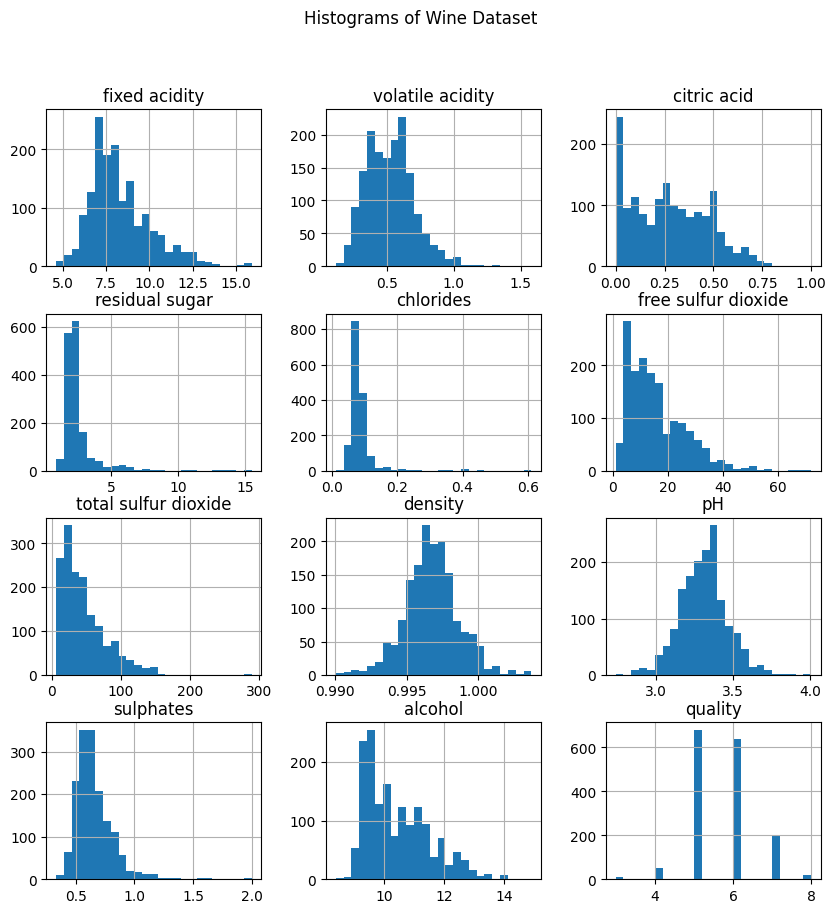

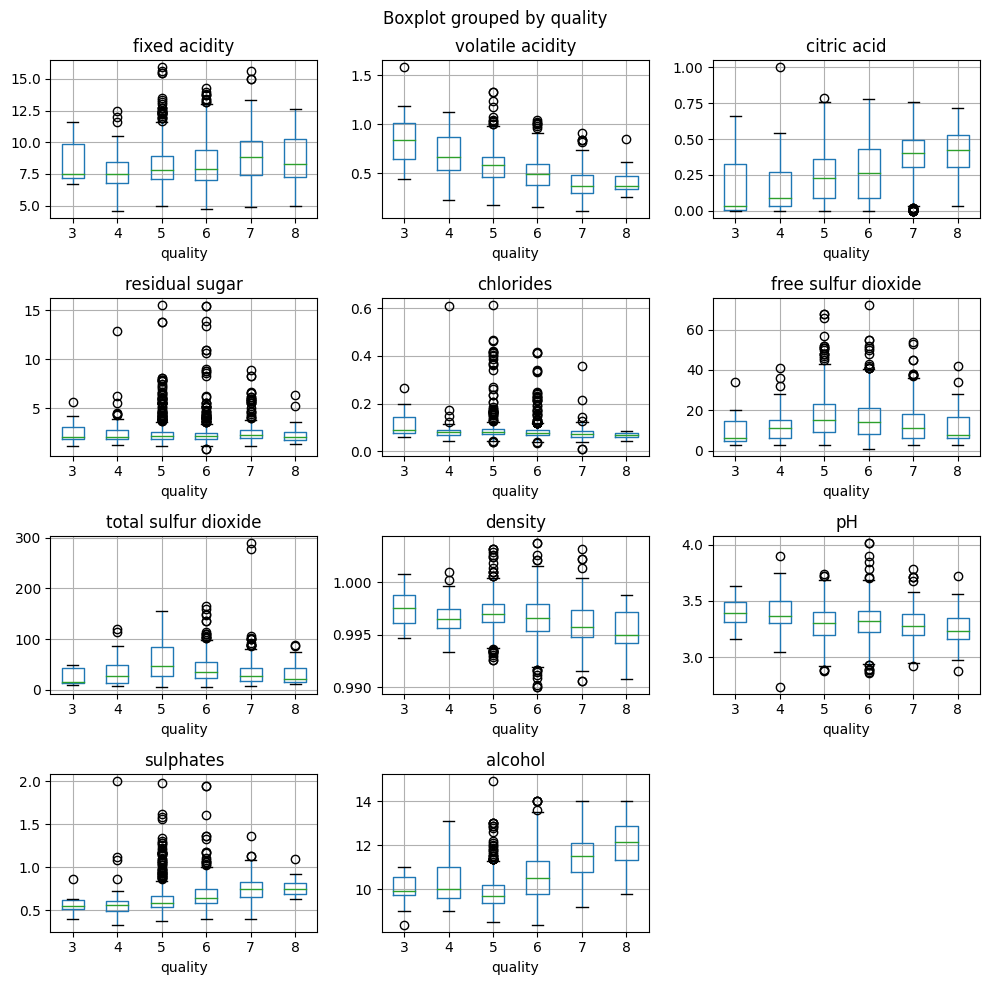

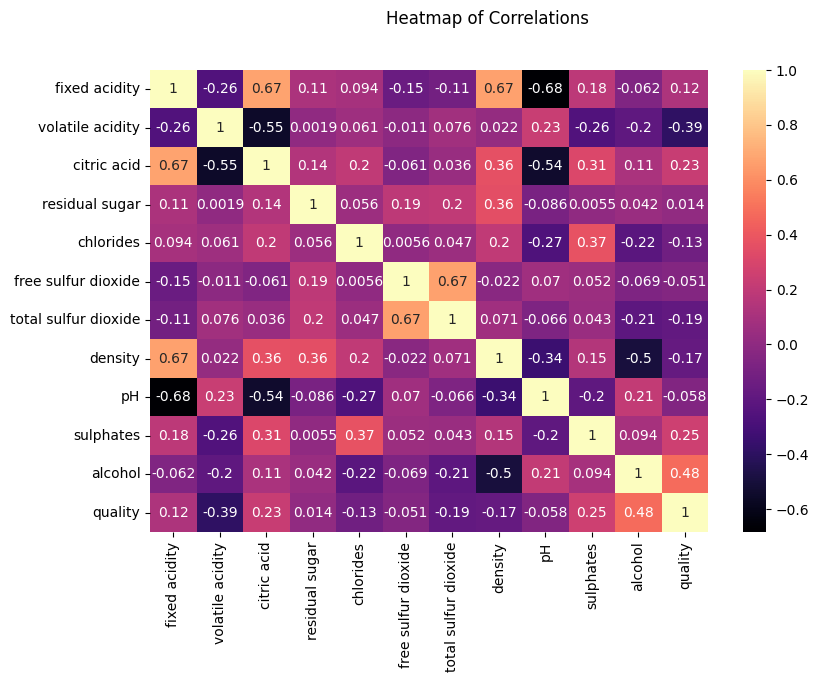

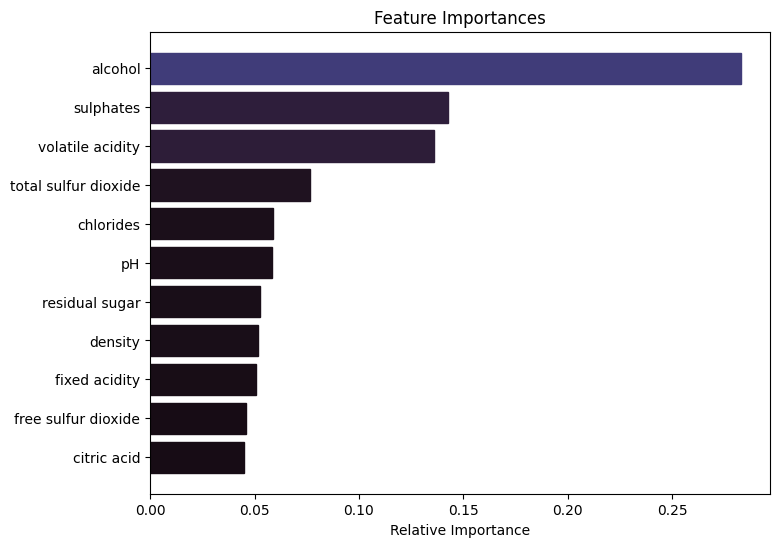

In [ ]:
# Create a neural network
input_size=red_wine_df.shape[1]-1
nn = neuralNetwork(input_size, 16, 8, 6, activation_type="sigmoid")
nn.exploratory_data_analysis(red_wine_df)
nn.preprocess()

# Train the neural network
X=nn.X_train
y=nn.y_train_cat
TestX=nn.X_test
TestY=nn.y_test_cat

# Here we do:
### 1)Train the Neural Network
### 2)Test the Performance of the Neural Network Model

In [13]:
# setup different parameter values
# learning rates
learning_rates = [0.1, 0.05, 0.01]
#epochs
epochs = [100, 500, 1000]
#different activation functions
activation_functions = ['sigmoid', 'tanh', 'relu']
opt=["true", "false"]

# train, test, and record parameters and accuracies
for optim in opt:
  #create empty lists to store different parameters, accuracies
  activation_function=[]
  learning_rate_values = []
  epoch_values = []
  train_accuracies = []
  test_accuracies = []
  for activation in activation_functions:
    for lr in learning_rates:
      for ep in epochs:
          nn = neuralNetwork(input_size, 16, 8, 6, activation_type=activation)
          nn.train(X, y, epochs=ep, learning_rate=lr, optimizer=optim)
          activation_function.append(activation)
          learning_rate_values.append(lr)
          epoch_values.append(ep)
          train_accuracies.append(nn.accuracy(X,y))
          test_accuracies.append(nn.accuracy(TestX,TestY))

  # save data into a dataframe
  data=pd.DataFrame()
  data = pd.DataFrame({
      'activation_function': activation_function,
      'learning_rate': learning_rate_values,
      'epochs': epoch_values,
      'train_accuracy': train_accuracies,
      'test_accuracy': test_accuracies,
  })

  # print the data in tabular form as required
  if optim=="true":
    print("With an optimizer")
    print(tabulate(data, headers=data.keys(), tablefmt='grid'))
    print(" ")
  if optim=="false":
    print("Without an optimizer")
    print(tabulate(data, headers=data.keys(), tablefmt='grid'))

With an optimizer
+----+-----------------------+-----------------+----------+------------------+-----------------+
|    | activation_function   |   learning_rate |   epochs |   train_accuracy |   test_accuracy |
+====+=======================+=================+==========+==================+=================+
|  0 | sigmoid               |            0.1  |      100 |       0.426896   |        0.421875 |
+----+-----------------------+-----------------+----------+------------------+-----------------+
|  1 | sigmoid               |            0.1  |      500 |       0.0117279  |        0.009375 |
+----+-----------------------+-----------------+----------+------------------+-----------------+
|  2 | sigmoid               |            0.1  |     1000 |       0.387803   |        0.44375  |
+----+-----------------------+-----------------+----------+------------------+-----------------+
|  3 | sigmoid               |            0.05 |      100 |       0.00625489 |        0.00625  |
+----+------

In [ ]:
data=pd.DataFrame()

# Date and Time of Last Compile

In [ ]:
# Get the current date and time
timezone = pytz.timezone('US/Central')
current_datetime = datetime.datetime.now(timezone)

# Print the current date and time
print("Current date and time:", current_datetime)

Current date and time: 2023-07-05 22:52:26.681183-05:00
